In [1]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Correlation matrix
def plot_corr_matrix(df, g_width):
    file_name = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(g_width, g_width), dpi=80, facecolor='w', edgecolor='k')
    corr_matrix = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corr_matrix)
    plt.title(f'Correlation Matrix for {file_name}', fontsize=15)
    plt.show()

In [3]:
# Scatter and density plots
def plot_scatter_mat(df, plot_size, text_size):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    ## drop nan values
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    column_names = list(df)
    if len(column_names) > 10:
        column_names = column_names[:10]
    df = df[column_names]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corr = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corr[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [4]:
n_rows = 1000

df = pd.read_csv('Stock Prediction Data/all_stocks_5yr.csv', delimiter=',', nrows = n_rows)
df.dataframeName = 'all_stocks_5yr.csv'

In [5]:
df.shape

(1000, 7)

In [6]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_8060\4082665887.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_8060\4082665887.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


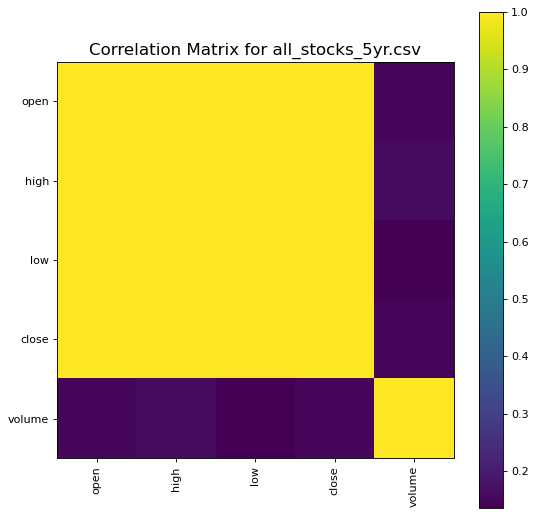

In [8]:
plot_corr_matrix(df, 8)

C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_8060\1952345144.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


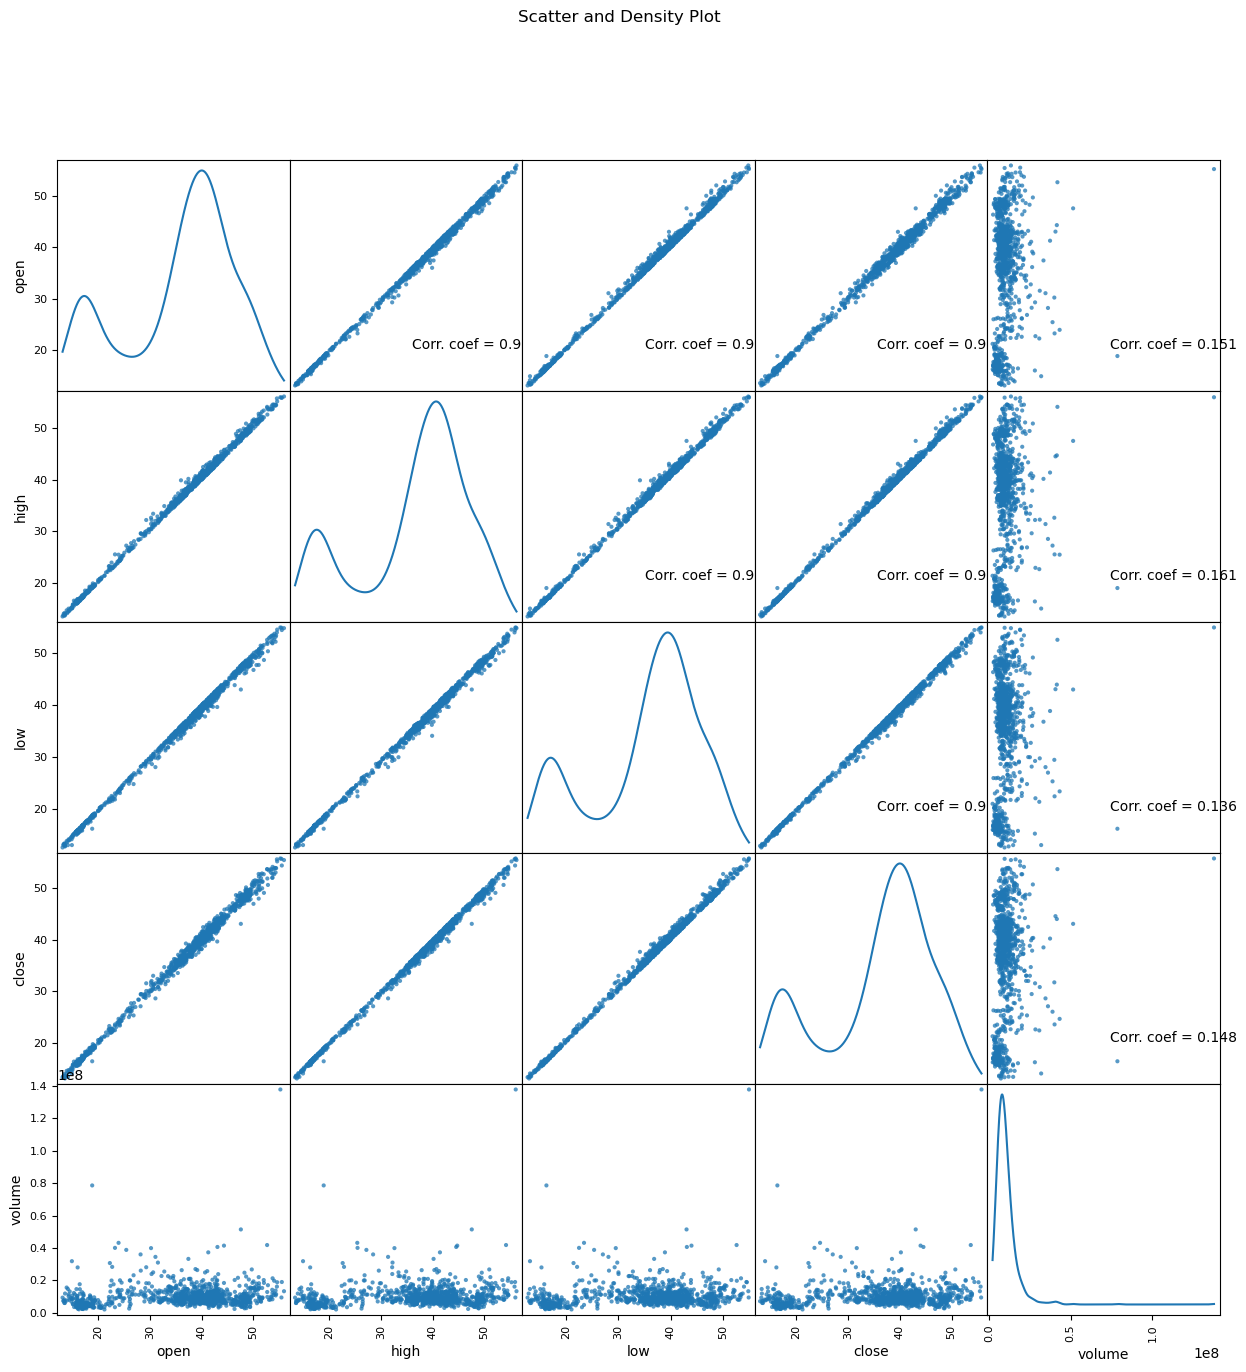

In [9]:
plot_scatter_mat(df, 15, 10)

## 2nd Dataset

In [11]:
n_rows = 1000

df_1 = pd.read_csv(r'Stock Prediction Data\individual_stocks_5yr\individual_stocks_5yr/ABC_data.csv', delimiter=',', nrows = n_rows)
df_1.dataframeName = 'ABC_data.csv'

In [12]:
df_1.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,46.52,46.895,46.46,46.89,1232802,ABC
1,2013-02-11,46.85,47.000,46.50,46.76,1115888,ABC
2,2013-02-12,46.70,47.050,46.60,46.96,1318773,ABC
3,2013-02-13,46.74,46.900,46.60,46.64,2645247,ABC
4,2013-02-14,46.67,46.990,46.60,46.77,1941879,ABC


In [13]:
df_1.shape

(1000, 7)

C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_8060\4082665887.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_8060\4082665887.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


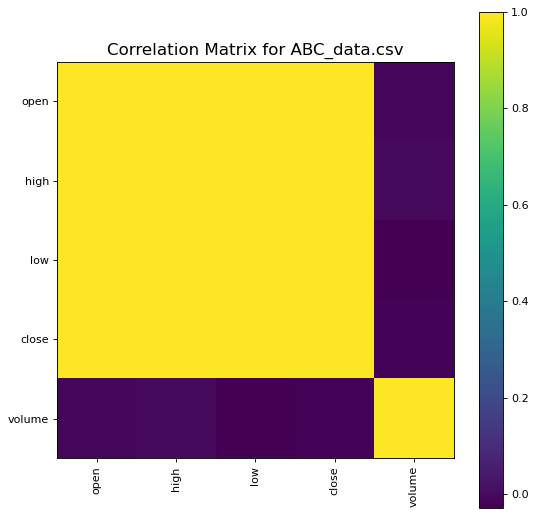

In [14]:
plot_corr_matrix(df_1, 8)

C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_8060\1952345144.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


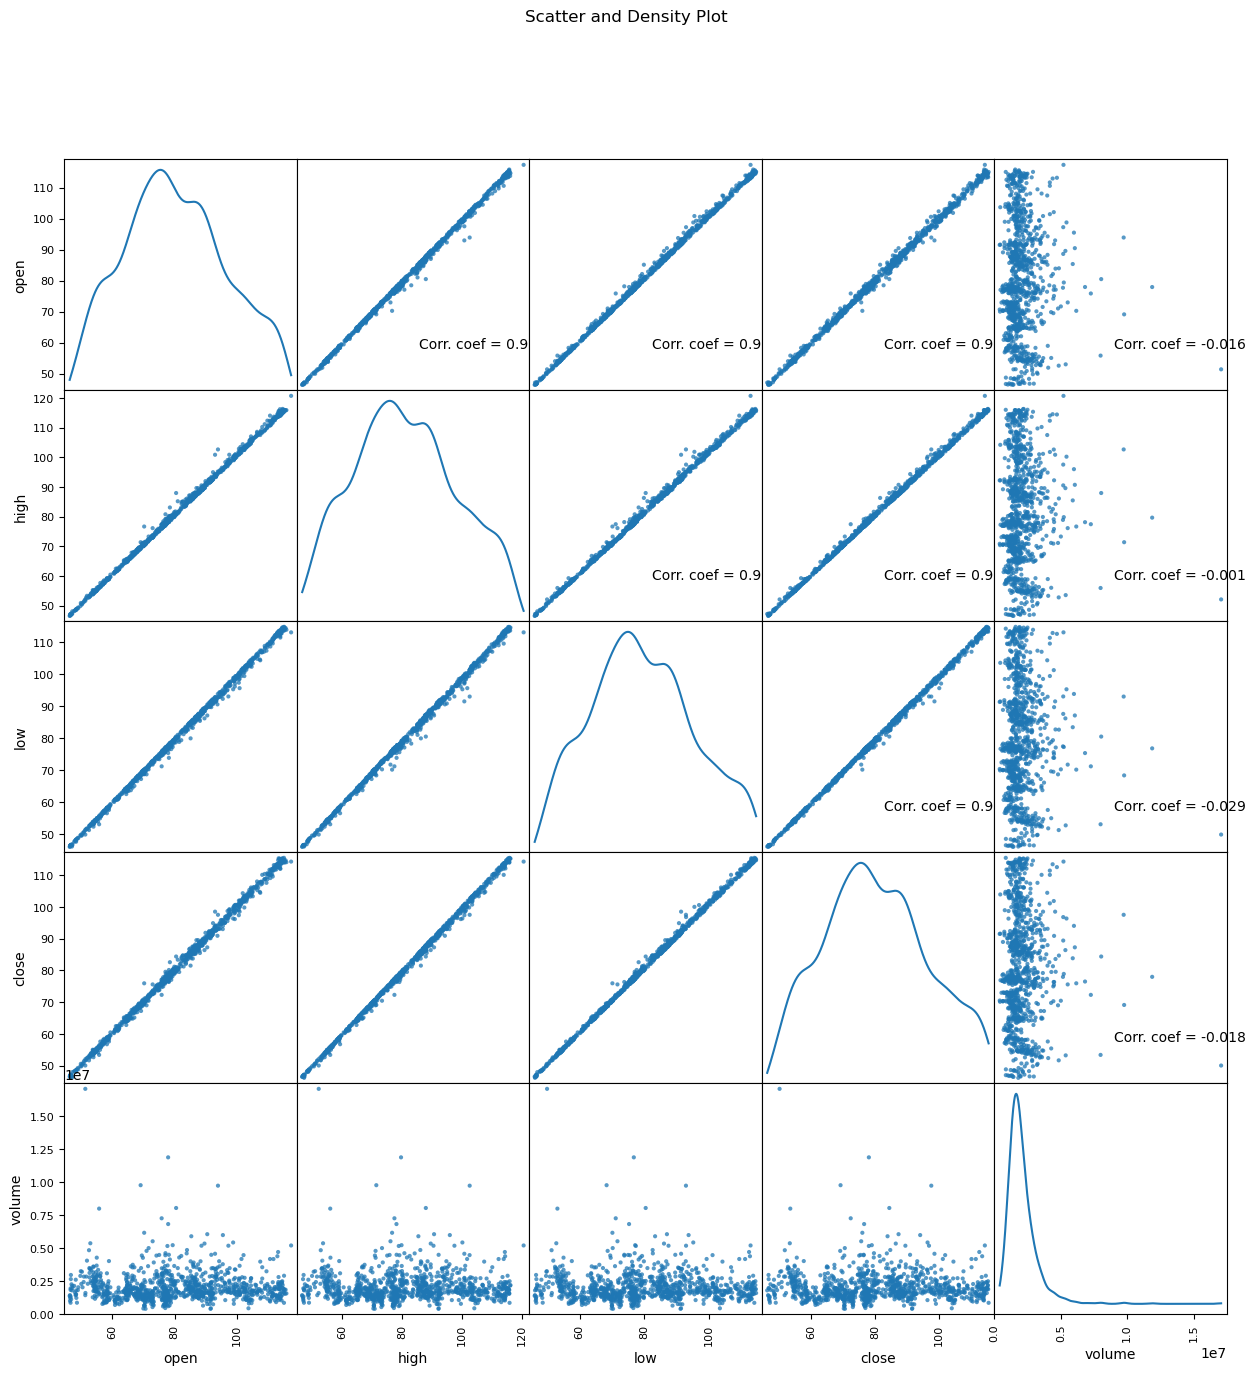

In [15]:
plot_scatter_mat(df_1, 15, 10)